In [3]:
#Importujemy potrzebne biblioteki

In [3]:
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Rescaling, Activation, Softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

In [5]:
#Instalacja Tonera

In [5]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00


In [6]:
import keras_tuner as kt
from keras_tuner import RandomSearch, Objective

In [12]:
#Wyczytanie danych

In [7]:
boston = load_boston()
boston

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['target'] = boston.target
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [30]:
#Genererujemy losowo liczbe z zakresu(Ilosc wierszy) i wyswietlamy proble  o tym indeksie

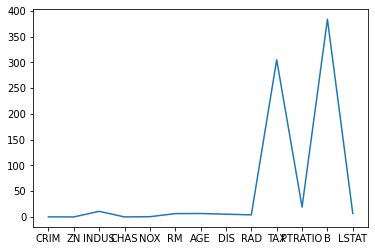

In [9]:
INDEX = random.randint(0,505)
plt.plot(data.iloc[INDEX,:-1])
plt.show() 

In [36]:
#Opisujemy zmiene

In [38]:
X = data.drop('target', 1)
y = data.loc[:, data.columns == 'target']
y

<ipython-input-38-1629cbd6ee18>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('target', 1)


,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [39]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
#Dzielimy zbior danych na testowe i uczacy sie

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [51]:
#Standaryzujemy cechy, usuwając średnią i skalujemy do wariancji jednostkowej

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
#Grupowanie danych oparte na gęstości, Wydzielamy klasy dla których odleglosc miedzy probkami (eps) 5 i muinimalna ilosc probek w klasie (min_samples) 8.

In [42]:
db = DBSCAN(eps=100, min_samples=100).fit(X)
labels = db.labels_
np.unique(labels)

array([-1,  0,  1])

In [53]:
#Przypisujemy uzyskane klasy do tabeli danych

In [43]:
data_db = data.copy()
data_db['db_cluster'] = labels
data_db

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,db_cluster
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,0


In [54]:
#Możemy kolorowac klasy przypisuwujag odpowiedni kolor,gdzie b-blue,g-green,r-red

In [44]:
data_db['db_color'] = data_db['db_cluster']
data_db['db_color'].replace([-1, 0,1], ['b', 'g','r'], inplace=True)
data_db

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,db_cluster,db_color
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0,g
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0,g
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0,g
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0,g
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,0,g
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0,g
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0,g
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,0,g


In [55]:
#Genererujemy losowom liczbe z zakresu(Ilosc wierszy) i wyswietlamy proble  o tym indeksie, w zależnosci od znaczenia db_color, wykres bedzie odpowiedniego koloru

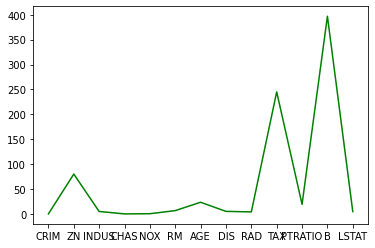

In [45]:
INDEX = random.randint(0,505)
plt.plot(data_db.iloc[INDEX,:-3], color=data_db.iloc[INDEX,:]['db_color'])
plt.show()

In [56]:
#Usuwamy ostatnio dodane tabeli

In [46]:
X_db = data_db.drop('target', 1)
X_db = X_db.drop('db_color', 1)
y_db = data_db.iloc[:,-3]

<ipython-input-46-0e88db71bd49>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_db = data_db.drop('target', 1)
<ipython-input-46-0e88db71bd49>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_db = X_db.drop('db_color', 1)


In [57]:
#Przeprowadzamy tą smą procedure dla wybranych danych

In [47]:
encoder = LabelEncoder()
y_db = encoder.fit_transform(y_db)

In [48]:
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_db, y_db, test_size=0.35)

In [49]:
scaler = StandardScaler()
scaler.fit(X_train_db)
X_train_db = scaler.transform(X_train_db)
X_test_db = scaler.transform(X_test_db)

In [61]:
#Uzywamy modelu sekwencjnego

In [55]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

In [78]:
#Po „zbudowaniu” modelu można wywołać jego summary()metodę, aby wyświetlić jego zawartość

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [80]:
#Wizualizacja modelu

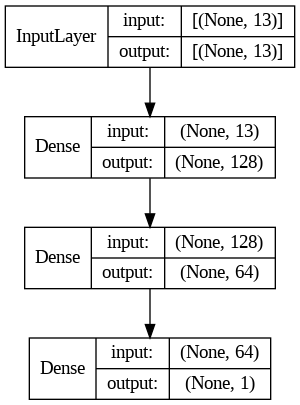

In [57]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [82]:
#Konfigurucja modelu do trenowania.

In [76]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [85]:
#Budujemy naszą sieć neuronową ANN. Najpierw tworzymy warstwę wejściową z 506 węzłami, to liczba rzędów w naszym zbiorze treningowym. Następnie dodajemy ukryte warstwy.

In [62]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=506, activation='elu', input_shape=X_train[0].shape))
ann.add(tf.keras.layers.Dense(units=100, activation='elu'))
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [71]:
ann.compile(optimizer='adam', loss='mse', metrics=['mae'])
ann.fit(X_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
4/4 [==============================] - 1s 8ms/step - loss: 14913.7773 - mae: 106.6480
Epoch 2/64
4/4 [==============================] - 0s 11ms/step - loss: 14905.3701 - mae: 106.6103
Epoch 3/64
4/4 [==============================] - 0s 6ms/step - loss: 14897.6611 - mae: 106.5746
Epoch 4/64
4/4 [==============================] - 0s 7ms/step - loss: 14890.1953 - mae: 106.5404
Epoch 5/64
4/4 [==============================] - 0s 11ms/step - loss: 14882.6201 - mae: 106.5050
Epoch 6/64
4/4 [==============================] - 0s 9ms/step - loss: 14874.5107 - mae: 106.4658
Epoch 7/64
4/4 [==============================] - 0s 8ms/step - loss: 14865.4590 - mae: 106.4220
Epoch 8/64
4/4 [==============================] - 0s 7ms/step - loss: 14855.3564 - mae: 106.3743
Epoch 9/64
4/4 [==============================] - 0s 8ms/step - loss: 14844.1279 - mae: 106.3228
Epoch 10/64
4/4 [==============================] - 0s 11ms/step - loss: 14833.0674 - mae: 106.2705
Epoch 11/64
4/4 [=========

In [72]:
#ewaluacja modelu ann

In [73]:
results = ann.evaluate(X_test, y_test)


6/6 [==============================] - 0s 5ms/step - loss: 16763.4492 - mae: 117.0226


In [74]:
ann.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 506)               7084      
                                                                 
 dense_16 (Dense)            (None, 100)               50700     
                                                                 
 dense_17 (Dense)            (None, 506)               51106     
                                                                 
Total params: 108,890
Trainable params: 108,890
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
11/11 [==============================] - 1s 3ms/step - loss: 206.1091 - mae: 10.6887
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 205.5106 - mae: 10.7572
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 201.4123 - mae: 10.6460
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 202.2787 - mae: 10.5914
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 200.8902 - mae: 10.5432
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 198.3005 - mae: 10.4083
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 202.2784 - mae: 10.5897
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 198.3005 - mae: 10.4822
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 198.5848 - mae: 10.5386
Epoch 10/10
11/11 [==============================] - 0s 3ms/step - loss: 199.2259 - mae: 10.4679


In [78]:
#Wizualizacja modelu

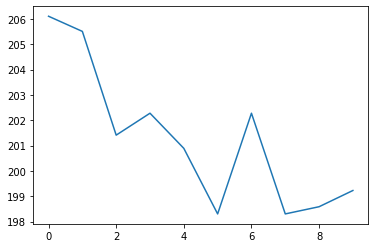

In [79]:
plt.plot(history.history['loss'])

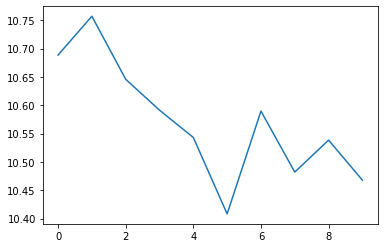

In [81]:
plt.plot(history.history['mae'])

In [82]:
#Ewaluacja modelu

In [83]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 8ms/step - loss: 551.2457 - mae: 16.0061


[551.2456665039062, 16.006088256835938]

In [84]:
ann.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 16763.4492 - mae: 117.0226


[16763.44921875, 117.02263641357422]

In [98]:
model_db = Sequential()
model_db.add(Dense(128, input_shape=(14, ), activation='relu'))
model_db.add(Dense(64, activation='relu'))
model_db.add(Dense(32, activation='relu'))
model_db.add(Dense(1, activation='linear'))

In [100]:
model_db.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [99]:
model_db.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               1920      
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [101]:
history_db = model_db.fit(X_train_db, y_train_db, epochs=10)

Epoch 1/10
11/11 [==============================] - 1s 2ms/step - loss: 15830.1006 - mae: 111.0933
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 15379.5361 - mae: 109.2948
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 14489.9834 - mae: 105.7821
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 12804.6689 - mae: 98.9612
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 9776.0146 - mae: 85.6039
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 5768.2197 - mae: 63.2889
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2626.2180 - mae: 41.3404
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 1887.2891 - mae: 33.9625
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 1413.9547 - mae: 29.5521
Epoch 10/10
11/11 [==============================] - 0s 3ms/step - loss: 1103.2241 - mae: 26.0957


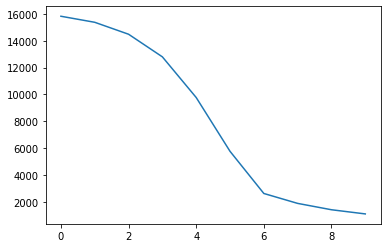

In [102]:
plt.plot(history_db.history['loss'])


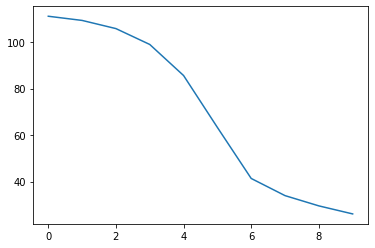

In [103]:
plt.plot(history_db.history['mae'])

In [104]:
model_db.evaluate(X_test_db, y_test_db)

6/6 [==============================] - 0s 4ms/step - loss: 1108.2039 - mae: 24.4376


[1108.203857421875, 24.43755531311035]

In [115]:
def build_model(hp):

  model = Sequential()
  model.add(Flatten(input_shape=(14,)))
  #model.add(Dense(hp.Int('units_1', min_value=1, max_value=128, step=6)))
  model.add(Dense(hp.Int('units_2', min_value=2, max_value=64, step=4), activation=hp.Choice('activation_1', values=['relu', 'elu'])))
  model.add(Dense(hp.Int('units_3', min_value=1, max_value=32, step=2)))
  model.add(Activation(hp.Choice('activation_2', values=['relu', 'softmax'])))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  model.compile( loss='mse', optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=0.001, max_value=0.99, step=0.01)), metrics='mae')
  
  return model

In [107]:
#Tuning modelu

In [121]:
tuner = kt.RandomSearch(hypermodel=build_model, objective='val_mae', max_trials=10, overwrite=True)

In [119]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 64, 'step': 4, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu'], 'ordered': False}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 32, 'step': 2, 'sampling': None}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax'], 'ordered': False}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.99, 'step': 0.01, 'sampling': None}


In [122]:
tuner.search(X_train_db, y_train_db, validation_data=(X_test_db, y_test_db), epochs=10)

Trial 10 Complete [00h 00m 02s]
val_mae: 108.81572723388672

Best val_mae So Far: 108.81572723388672
Total elapsed time: 00h 00m 19s


In [ ]:
#Wywolujemy metode results_summary objektu tuner

In [123]:
tuner.results_summary(1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
units_2: 62
activation_1: elu
units_3: 1
activation_2: softmax
learning_rate: 0.8009999999999998
Score: 108.81572723388672


In [124]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]

In [125]:
type(models[0])

keras.engine.sequential.Sequential

In [126]:
#Najlepszy model

In [127]:
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 62)                930       
                                                                 
 dense_1 (Dense)             (None, 1)                 63        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-trainabl

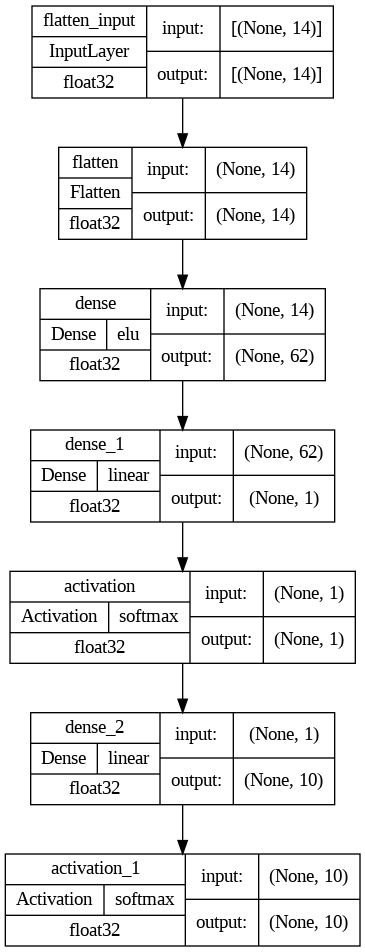

In [128]:
plot_model(best_model, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

In [130]:
#Ewaluacja nalepszego modelu

In [129]:
best_model.evaluate(X_test_db, y_test_db)

6/6 [==============================] - 0s 4ms/step - loss: 15045.3076 - mae: 108.8157


[15045.3076171875, 108.81572723388672]

In [131]:
#Wnoisek. Przy stosowaniu rożnych modeli uczenia maszynowego uzyskalismy podobnie Bardzo dobry wynik. jednak poprawic kazdy model możemy dobierając odpowiednio parametry.